# Introduction
Customer segmentation is a powerful marketing technique that involves dividing a customer base into distinct segments based on shared characteristics, behaviours, or demographics. The primary purpose of customer segmentation is to better understand and serve customers in a more personalized and targeted way. Marketing segmentation helps to understand customer needs better and reach the right customer with right messaging.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

### Loading Data Set

In [2]:
data = pd.read_csv(r'D:\OASIS\PROJECT 2 PROPOSAL 1\ifood_df.csv')
data.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [3]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### 1 Key Concept and Challenge Completed
Data Collection: Obtain a dataset containing customer information, purchase history, and relevant data

### Data Cleaning
Removing Null Values

In [4]:
data = pd.read_csv(r'D:\OASIS\PROJECT 2 PROPOSAL 1\ifood_df.csv')
print(data.isnull().sum())

#drop missing values
data.dropna(inplace=True)
data.drop_duplicates(inplace=True) #Removing duplicate values
print('\n',data.head())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

Checking duplicate values

In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

In [7]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

### Data Exploration

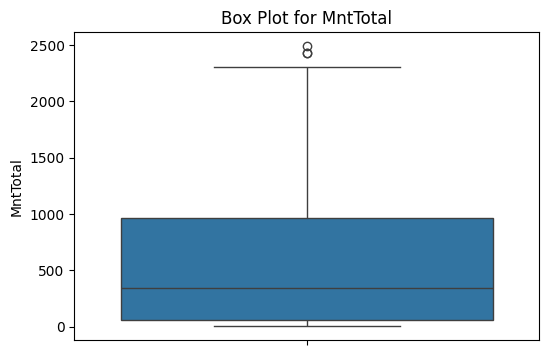

In [8]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

Outliers

In [9]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


Outliers Removal

In [10]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,51630.820119,0.444004,0.510406,48.893954,305.178394,26.199703,164.996036,37.518335,27.093162,43.875619,...,0.251734,0.034688,0.090684,0.024281,0.502478,0.165015,0.217542,560.985629,517.110010,0.300297
std,20676.523136,0.536322,0.546445,28.964198,336.123164,39.563725,218.284750,54.888293,41.356022,51.690029,...,0.434117,0.183033,0.287230,0.153960,0.500118,0.371286,0.412677,572.595924,550.571315,0.678306
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35395.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51400.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68138.000000,1.000000,1.000000,74.000000,505.000000,33.000000,227.750000,50.000000,33.750000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,882.250000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [11]:
data['marital_Single'] = data['marital_Single'].replace(1, 2)
data['marital_Together'] = data['marital_Together'].replace(1, 3)
data['marital_Widow'] = data['marital_Widow'].replace(1, 4)
data['marital_Divorced'] = data['marital_Divorced'].replace(1, 5)

data['marital_Status'] = data['marital_Married'] + data['marital_Single'] + data['marital_Together'] + data['marital_Widow'] + data['marital_Divorced']
data['marital_Status'] = data['marital_Status'].map({1: 'married', 2: 'single', 3: 'together', 4: 'widow', 5: 'divorced'})

In [12]:
cols_demographics = ['Income','Age']

In [13]:
data.drop(['marital_Married','marital_Single','marital_Divorced','marital_Together','marital_Widow'], axis=1, inplace=True)
data['marital_Status'].unique()

array(['single', 'together', 'married', 'divorced', 'widow'], dtype=object)

In [14]:
data['education_Basic'] = data['education_Basic'].replace(1, 2)
data['education_Graduation'] = data['education_Graduation'].replace(1, 3)
data['education_Master'] = data['education_Master'].replace(1, 4)
data['education_PhD'] = data['education_PhD'].replace(1, 5)

data['education_Status'] = data['education_2n Cycle'] + data['education_Basic'] + data['education_Graduation'] + data['education_Master'] + data['education_PhD']
data['education_Status'] = data['education_Status'].map({1: '2n cycle', 2: 'basic', 3: 'graduation', 4: 'master', 5: 'phd'})

In [15]:
data.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD'], axis = 1, inplace=True)
data['education_Status'].unique()

array(['graduation', 'phd', 'master', 'basic', '2n cycle'], dtype=object)

Updated Columns of Marital and Educational Status

In [16]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status'],
      dtype='object')

In [17]:
data['total_kid'] = data['Kidhome']+data['Teenhome']
data.drop(['Kidhome', 'Teenhome'], axis =1 , inplace = True)

In [18]:
data['Frequency'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [19]:
data.head(10)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,education_Status,total_kid,Frequency
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,2822,1529,1441,0,single,graduation,0,22
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,2272,21,15,0,single,graduation,2,4
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,2471,734,692,0,together,graduation,0,20
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,2298,48,43,0,together,graduation,1,6
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,2320,407,392,0,married,phd,1,14
5,62513.0,16,520,42,98,0,42,14,2,6,...,0,53,2452,702,688,0,together,master,1,20
6,55635.0,34,235,65,164,50,49,27,4,7,...,0,49,2752,563,536,0,divorced,graduation,1,17
7,33454.0,32,76,10,56,3,1,23,2,4,...,0,35,2576,146,123,0,married,phd,1,8
8,30351.0,19,14,0,24,3,3,2,1,3,...,1,46,2547,44,42,0,together,phd,1,5
9,5648.0,68,28,0,6,1,1,13,1,1,...,0,70,2267,36,23,1,together,phd,2,1


### 2 Key Concept and Challenge Completed
Data Cleaning and Exploration : Explore the dataset, understand its structure, and handle any missing or inconsistent data

### Descriptive Statistics

In [20]:
mean_purchase = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

In [21]:
average_purchase = data['MntTotal'].mean()

Frequency of purchases

In [22]:
mean_web_purchase = data['NumWebPurchases'].mean()
mean_store_purchase = data['NumStorePurchases'].mean()

In [23]:
print("Mean Purchase Value:\n", mean_purchase)
print("\nAverage Spending per Purchase:", average_purchase)
print("\nMean Web Purchases:", mean_web_purchase)
print("\nMean Store Purchases:", mean_store_purchase)

Mean Purchase Value:
 MntWines            305.178394
MntFruits            26.199703
MntMeatProducts     164.996036
MntFishProducts      37.518335
MntSweetProducts     27.093162
MntGoldProds         43.875619
dtype: float64

Average Spending per Purchase: 560.9856293359762

Mean Web Purchases: 4.114965312190288

Mean Store Purchases: 5.801288404360753


In [24]:
descriptive_stats = data[['Income', 'Age', 'NumWebPurchases', 'NumStorePurchases', 'MntTotal', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Customer_Days']].describe()


In [25]:
print(descriptive_stats)

              Income          Age  NumWebPurchases  NumStorePurchases  \
count    2018.000000  2018.000000      2018.000000        2018.000000   
mean    51630.820119    51.148662         4.114965           5.801288   
std     20676.523136    11.647683         2.754662           3.228784   
min      1730.000000    24.000000         0.000000           0.000000   
25%     35395.000000    43.000000         2.000000           3.000000   
50%     51400.500000    50.000000         4.000000           5.000000   
75%     68138.000000    61.000000         6.000000           8.000000   
max    113734.000000    80.000000        27.000000          13.000000   

          MntTotal  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
count  2018.000000   2018.000000   2018.000000   2018.000000   2018.000000   
mean    560.985629      0.065411      0.012884      0.074331      0.076809   
std     572.595924      0.247311      0.112802      0.262374      0.266354   
min       4.000000      0.0000

### 3 Key Concept and Challenge Completed
Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of purchases, etc

### Customer Segmentation

### Importing Additional Libraries

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
X = data[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days']]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

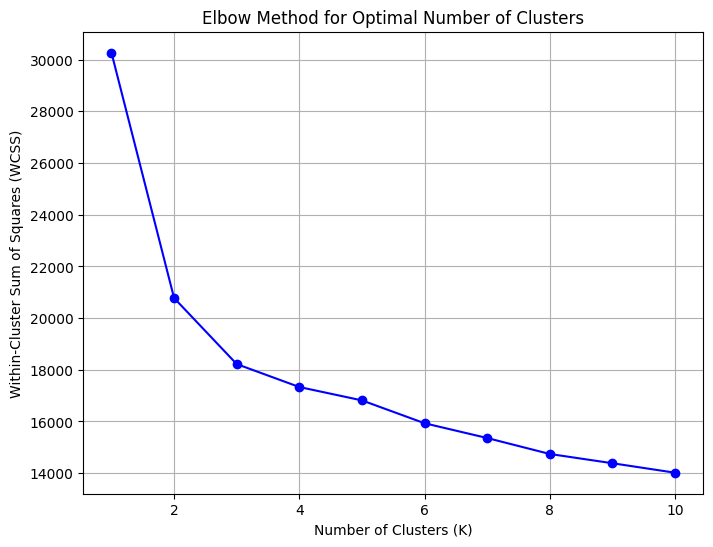

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [32]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

### 4 Key Concept and Challenge Completed
Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment customers based on behavior and purchase patterns

### Visualization

In [33]:
data.isnull().sum().sum()
data.isna().sum()

Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Customer_Days          0
MntTotal               0
MntRegularProds        0
AcceptedCmpOverall     0
marital_Status         0
education_Status       0
total_kid              0
Frequency              0
Cluster                0
dtype: int64

In [34]:
selected_features = ['Income', 'Age', 'NumWebPurchases', 'MntWines', 'Customer_Days']

Scatter plots

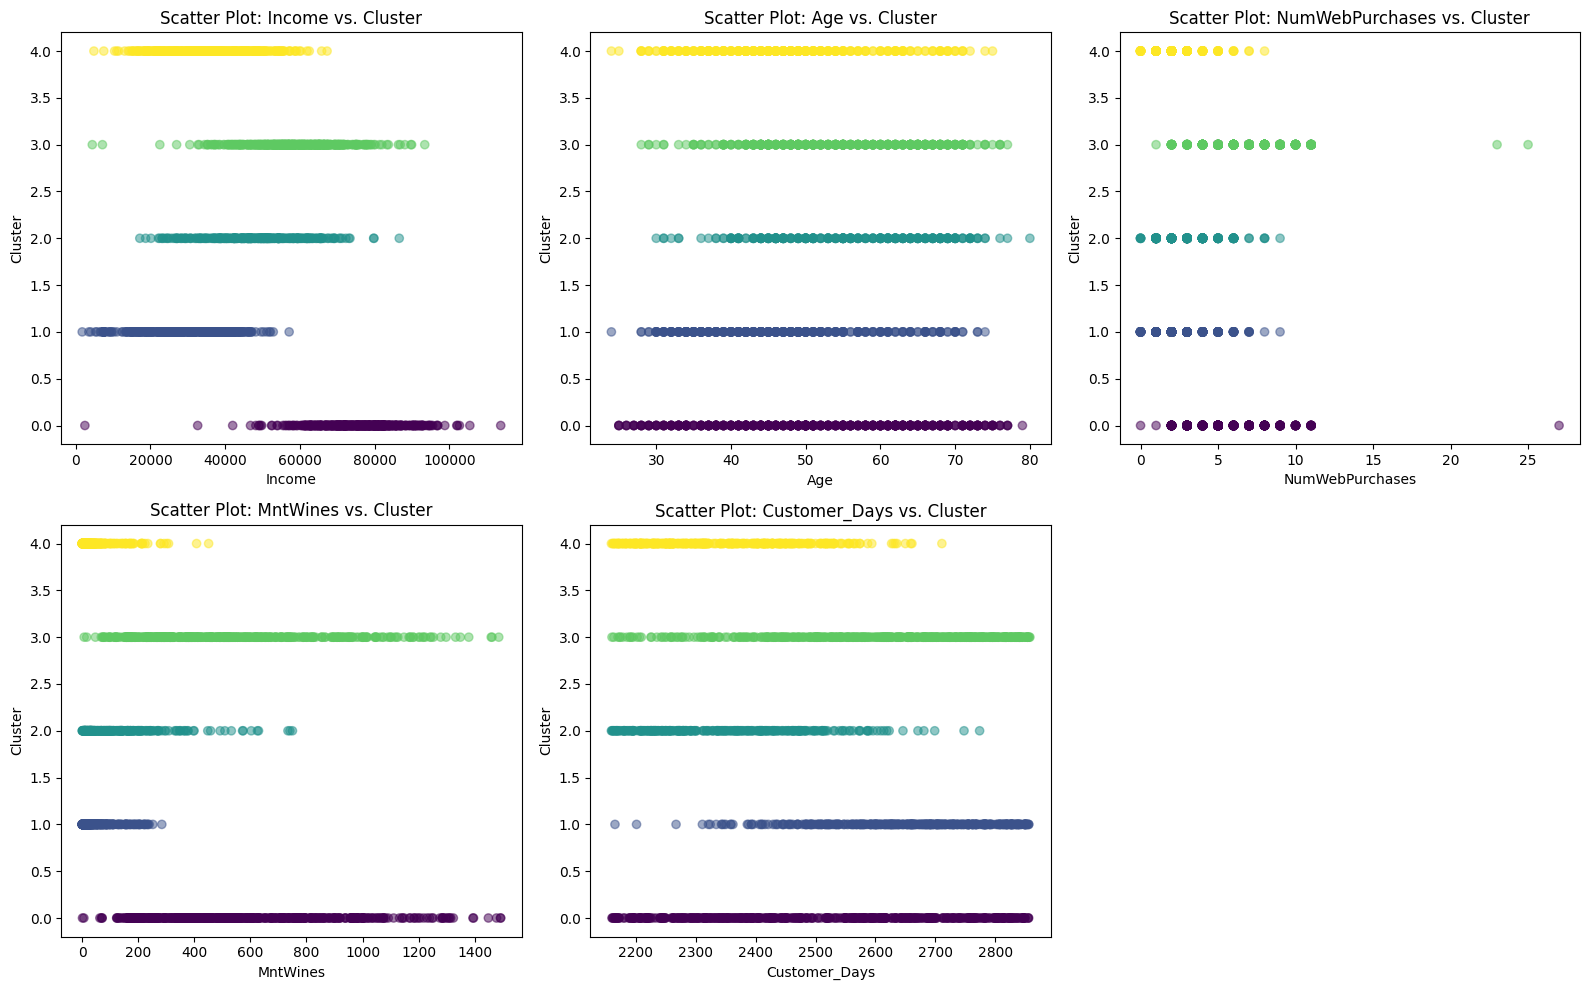

In [35]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[feature], data['Cluster'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs. Cluster')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

Bar Chart

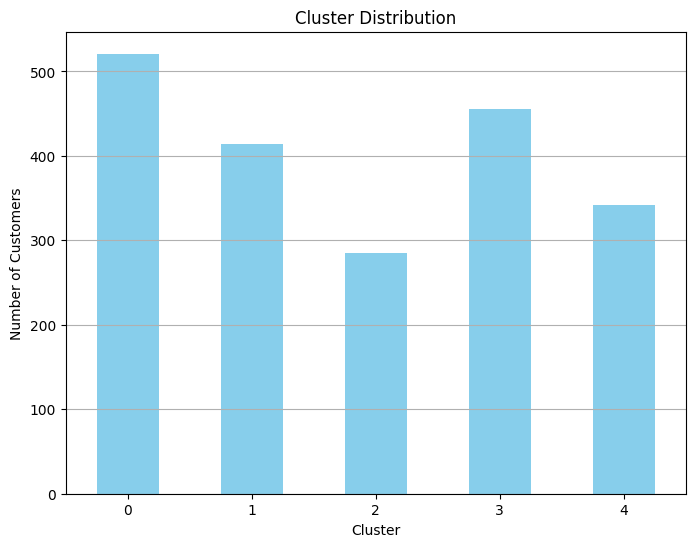

In [36]:
cluster_counts = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Line Chart

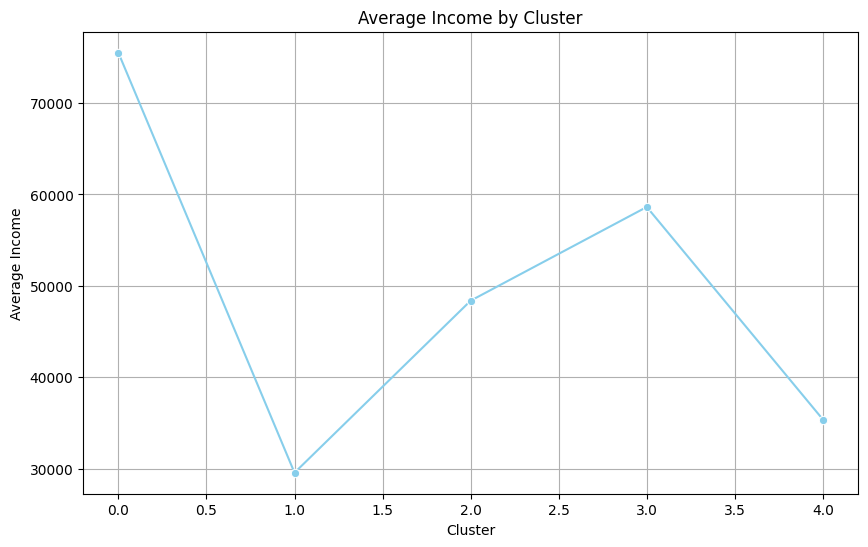

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cluster', y='Income', data=data, estimator='mean', marker='o', color='skyblue', errorbar=None)
plt.title('Average Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

Heat Map

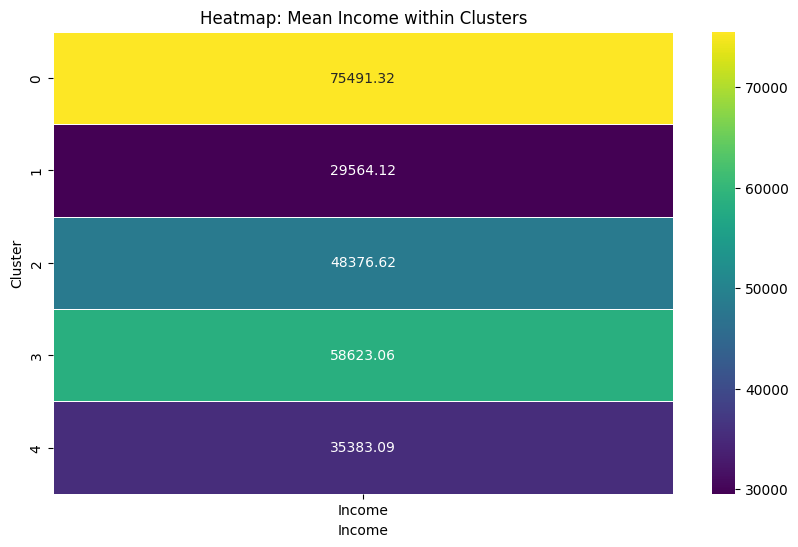

In [38]:
pivot_table = data.pivot_table(index='Cluster', values='Income', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap: Mean Income within Clusters')
plt.xlabel('Income')
plt.ylabel('Cluster')
plt.show()


### 5 Key Concept and Challenge Completed
Visualization: Create visualizations (scatter plots, bar charts, line chart and heat map) to illustrate customer segments

### Insights and Recommendations

In [39]:
cluster_stats = data.groupby('Cluster').agg({
    'Income': 'mean',
    'Recency': 'mean',
    'MntWines': 'mean',
    'MntTotal': 'mean',
    'Age': 'mean',
    })

<Figure size 1000x600 with 0 Axes>

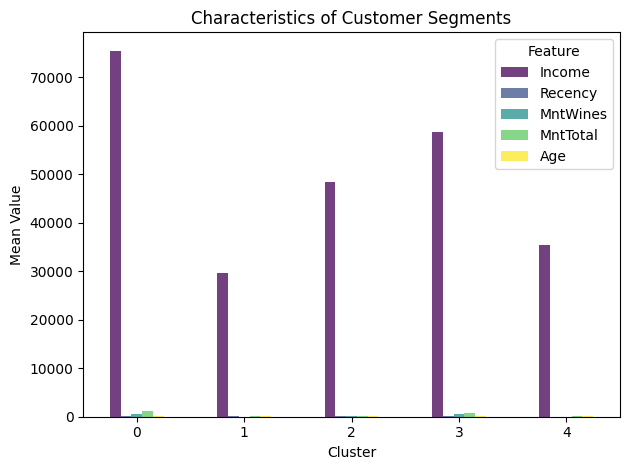

In [40]:
plt.figure(figsize=(10, 6))
cluster_stats.plot(kind='bar', colormap='viridis', alpha=0.75)
plt.title('Characteristics of Customer Segments')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

### Recommendations
1. Know Your Customers: Understand who your customers are and what they like.
2. Offer What They Want: Provide products and deals tailored to their preferences.
3. Make Shopping Easy: Keep the online store user-friendly for a smooth shopping experience.
4. Reward Loyalty: Show appreciation with rewards or special offers.
5. Stay Relevant: Keep up with customer trends to stay ahead in the market.

### 6 Key Concept and Challenge Completed
Insights and Recommendations: Analyze characteristics of each segment and provide insights
